In [1]:
import os

os.chdir("../")
os.getcwd()

'c:\\Users\\HP\\Desktop\\flight-comptetion\\NNights-team'

In [2]:
import numpy as np

from xgboost import XGBRegressor
from nnights.experiment import Experiment
from nnights.utils import load_flights

In [3]:
# experiment configs
config = {
    'enrich': [
        'add_is_holiday',
        'add_distance_to_next_holiday',
        'add_distance_to_previous_holiday',
        'add_distance_to_holidays',
        'add_path_distance',
        'add_path_embedding',
        'add_day_of_year', 
    ],
    'model': {
        'model_instance': XGBRegressor,
        'train_params': {
            'use_cv': True,
            'scale': {'li_features': []},
        }
    },
    'x_columns': ['avg_weeks', 'std_weeks'],
}

config_grid = {
    'model_instance': XGBRegressor,
    'grid_config': {
        'param_grid': {'max_depth': np.arange(7, 15)},
        'cv': 10,
        'n_jobs': 5
    }
}

In [4]:
# load data
flights_train = load_flights(dtype='train')
flights_test = load_flights(dtype='test')

-- Model start -------------
x_columns :  ['avg_weeks', 'std_weeks']
> fit model ...
model : XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
> cv results : 


> score model ...
RMSE on train : 0.7177673551104784
RMSE on test : 0.9506673037557407
--Feat imporance  ...
 


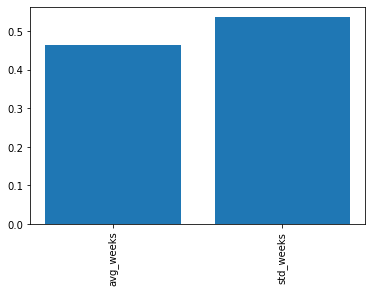

In [5]:
# init experiment
exp = Experiment(
    name="random-forest", 
    data=flights_train
)

# run experiment
exp.run(config)

In [6]:
exp.meta["cache"]['model']

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [7]:
score, best_params = exp.grid_search(config=config_grid)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [8]:
best_params

{'max_depth': 7}

-- Model start -------------
x_columns :  ['avg_weeks', 'std_weeks']
> fit model ...
model : XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=7,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
> cv results : 


> score model ...
RMSE on train : 0.6765585264763915
RMSE on test : 0.9583741795373972
--Feat imporance  ...
 


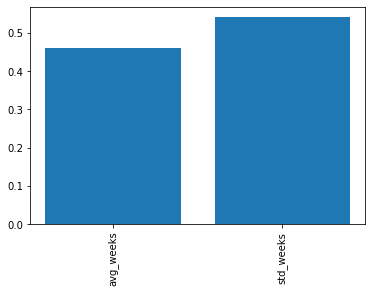

In [9]:
# run model with best params
config["model"]["model_params"] = best_params
exp.run(config=config, use_cache=True)

In [10]:
# exp.freeze("submission", flights_test, with_sub=True)